In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
matches = pd.read_csv('results_2.csv') 
missing = pd.read_csv('results_miss.csv') #missing matches

In [6]:
missing.head()

years = pd.read_csv('years_edit.csv')


In [7]:
matches = pd.merge(missing, years, how='inner', on='round_id')

In [9]:
matches.to_csv('results_miss2.csv')

In [7]:
years = pd.read_csv('years_edit.csv')
years.head()

,round_id,round,year_id,year,stage
0,10682,Semi-Final,71234,1872,4
1,10681,Second Round Proper,71234,1872,2
2,10683,Third Round Proper,71234,1872,3
3,10680,First Round Proper,71234,1872,1
4,10689,Third Round Proper,71235,1873,3


In [8]:
merged_new = pd.merge(matches_all, years, how='inner', on='round_id')
merged_new.head()

,home_team,away_team,match_id,round_id,replay,home_score,date,away_score,round,year_id,year,stage
0,Royal Engineers,Hampstead Heathens,16062,10683,False,3,27.01.72,0,Third Round Proper,71234,1872,3
1,Wanderers,Crystal Palace (1),16063,10683,False,0,20.01.72,0,Third Round Proper,71234,1872,3
2,Queen's Park (Glasgow),Bye,16061,10683,False,0,01.01.01,0,Third Round Proper,71234,1872,3
3,Royal Engineers,Crystal Palace (1),16066,10682,True,3,09.03.72,0,Semi-Final,71234,1872,4
4,Wanderers,Queen's Park (Glasgow),16065,10682,False,0,05.03.72,0,Semi-Final,71234,1872,4


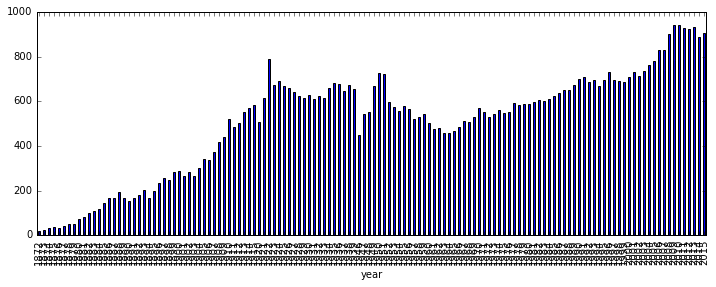

In [9]:
matches_per_year = merged_new.groupby('year')['year'].count()
%matplotlib inline
matches_per_year.plot(kind='bar', figsize=(12,4))

In [10]:
alltime_teams = pd.concat([merged_new['home_team'], merged_new['away_team']]).nunique()
print 'Number of teams entered since 1872:', alltime_teams

Number of teams entered since 1872: 3434


In [11]:
home_teams = merged_new[['home_team', 'year']]
away_teams = merged_new[['away_team', 'year']]
home_teams.columns.values[0] = 'team'
away_teams.columns.values[0] = 'team'

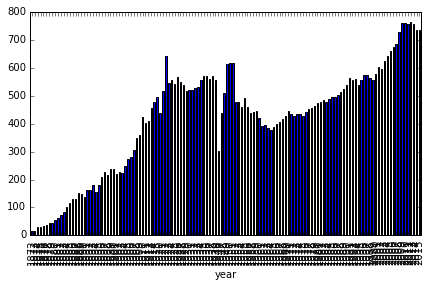

In [12]:
teams_per_year = pd.concat([home_teams, away_teams]).groupby('year')['team'].nunique()
teams_per_year.plot(kind='bar', figsize=(7,4))

In [13]:
merged_new['round'].value_counts()

First Qualifying Round     14314
Preliminary Round          13876
Second Qualifying Round     8063
First Round Proper          5795
Extra Preliminary Round     4801
Third Qualifying Round      4290
Third Round Proper          3986
Fourth Qualifying Round     3448
Second Round Proper         2970
Fourth Round Proper         1950
First Round Qualifying      1141
Fifth Round Proper           934
Second Round Qualifying      789
Sixth Round Proper           459
Fifth Qualifying Round       409
Third Round Qualifying       390
Fourth Round Qualifying      325
Semi-Final                   321
Sixth Qualifying Round       120
Intermediate Round            70
Final                         28
Semi Final                    16
Name: round, dtype: int64

In [14]:
merged_new['qualifier'] = merged_new['round'].str.contains("Qualifying|Preliminary") #search for regex expression, return boolean

In [15]:
merged_new['qualifier'].value_counts()

True     51966
False    16529
Name: qualifier, dtype: int64

In [16]:
merged_new[merged_new['qualifier'] == True]['round'].value_counts()

First Qualifying Round     14314
Preliminary Round          13876
Second Qualifying Round     8063
Extra Preliminary Round     4801
Third Qualifying Round      4290
Fourth Qualifying Round     3448
First Round Qualifying      1141
Second Round Qualifying      789
Fifth Qualifying Round       409
Third Round Qualifying       390
Fourth Round Qualifying      325
Sixth Qualifying Round       120
Name: round, dtype: int64

In [17]:
merged_new[merged_new['qualifier'] == False]['round'].value_counts()

First Round Proper     5795
Third Round Proper     3986
Second Round Proper    2970
Fourth Round Proper    1950
Fifth Round Proper      934
Sixth Round Proper      459
Semi-Final              321
Intermediate Round       70
Final                    28
Semi Final               16
Name: round, dtype: int64

In [18]:
merged_new.to_csv('facup_archive.csv')